<a href="https://colab.research.google.com/github/emmanueluzodike/Natural_Language_Processing/blob/main/Text%20Classifcation%202/Text_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras

In [ ]:
#imports 
import csv
import pandas as pd
import nltk
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report
nltk.download('popular')



DATA DETAILS

This dataset contains Item description as a feature and 4 different categories / classes - Household, Electronics, Books, Clothing & Accessories.

The model should be able to predict the catogry of an item given its description


In [4]:
with open("/content/ecommerceDataset(3).csv", encoding='utf-8') as file:
  data = pd.read_csv(file) 

In [5]:
data.columns=['category', 'description']

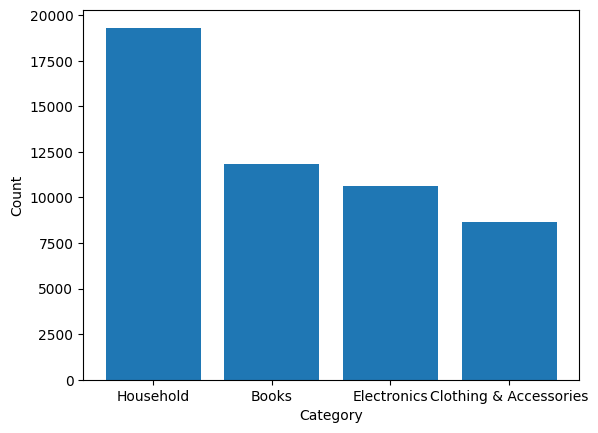

In [6]:
import matplotlib.pyplot as plt

# Plot categroty distribution
class_counts = data['category'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Text Preprocessing

In [7]:
data.dropna(subset=['description', 'category'], inplace=True)  # Remove empty rows
data.drop_duplicates(subset=['description', 'category'], inplace=True)  # Remove duplicates

In [7]:
data

,category,description
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
...,...,...
50401,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...
50402,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...
50406,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ..."
50407,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...


In [8]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', binary=True, max_features=2000)
X = vectorizer.fit_transform(data['description'])

In [9]:
# y = data.category
# X = data.description

In [9]:
from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y = le.fit_transform(y)
# y = pd.DataFrame(y, columns=['Class'])
categories = pd.get_dummies(data['category'])
y = categories.values

# Retrieve the encoding key pair values

In [11]:
# X_dense = vectorizer.fit_transform(X).toarray()

In [12]:
y

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [13]:
X

<27801x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 901276 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size = 0.2, train_size = 0.8, random_state=1234)
X_dense = X.toarray() 
X_train, X_temp, y_train, y_temp = train_test_split(X_dense, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train.shape

(19460, 2000)

In [15]:
# # Our vectorized labels
# import numpy as np
# y_train = np.asarray(y_train).astype('float32')
# y_test = np.asarray(y_test).astype('float32')

In [16]:
# input_shape = X_train.shape[1]

In [17]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [18]:
# compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               256128    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 264,644
Trainable params: 264,644
Non-trainable params: 0
_________________________________________________________________


In [20]:
# create a validation set
# x_val = X_train[:10000]
# partial_x_train = X_train[10000:]

# y_val = y_train[:10000]
# partial_y_train = y_train[10000:]

# sort the indices of partial_x_train
# partial_x_train = tf.sparse.reorder(partial_x_train)

In [21]:
# train

history = model.fit(X_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))



Epoch 1/10
609/609 [==============================] - 14s 7ms/step - loss: 0.3796 - accuracy: 0.8765 - val_loss: 0.2193 - val_accuracy: 0.9396
Epoch 2/10
609/609 [==============================] - 2s 4ms/step - loss: 0.1859 - accuracy: 0.9467 - val_loss: 0.2209 - val_accuracy: 0.9372
Epoch 3/10
609/609 [==============================] - 2s 4ms/step - loss: 0.1381 - accuracy: 0.9601 - val_loss: 0.2325 - val_accuracy: 0.9341
Epoch 4/10
609/609 [==============================] - 3s 5ms/step - loss: 0.1019 - accuracy: 0.9708 - val_loss: 0.2643 - val_accuracy: 0.9312
Epoch 5/10
609/609 [==============================] - 2s 4ms/step - loss: 0.0720 - accuracy: 0.9800 - val_loss: 0.2994 - val_accuracy: 0.9307
Epoch 6/10
609/609 [==============================] - 2s 4ms/step - loss: 0.0514 - accuracy: 0.9852 - val_loss: 0.3275 - val_accuracy: 0.9254
Epoch 7/10
609/609 [==============================] - 2s 4ms/step - loss: 0.0366 - accuracy: 0.9905 - val_loss: 0.3736 - val_accuracy: 0.9230
Epoch

In [22]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.4458572268486023 / Test accuracy: 0.9263965487480164


In [23]:
# use sklearn evaluation
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=categories.columns)
print(report)



131/131 [==============================] - 0s 2ms/step
                        precision    recall  f1-score   support

                 Books       0.90      0.92      0.91       941
Clothing & Accessories       0.95      0.97      0.96       857
           Electronics       0.93      0.89      0.91       777
             Household       0.92      0.92      0.92      1596

              accuracy                           0.93      4171
             macro avg       0.93      0.93      0.93      4171
          weighted avg       0.93      0.93      0.93      4171



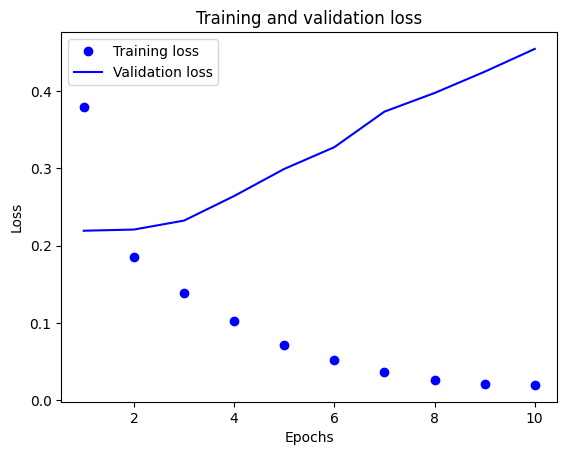

In [24]:
# plot the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

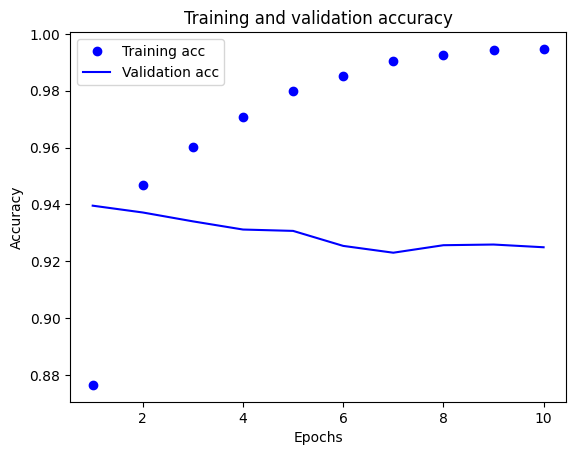

In [25]:
# plot the training and validation accuracy

plt.clf()   # clear

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



f

In [13]:
max_features = 5000
maxlen = 250
epochs = 10
emb_dim = 128
batch_size = 256
n_most_common_words = 8000
max_len = 130

In [27]:
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_val, y_val),callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 128)         1024000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 2000, 128)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1,073,668
Trainable params: 1,073,668
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
77/77 [==============================] - 683s 9s/step - loss: 1.3501 - acc: 0.3737 - val_loss:

In [28]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

131/131 [==============================] - 71s 541ms/step - loss: 1.3419 - acc: 0.3826
Test set
  Loss: 1.342
  Accuracy: 0.383


RNN

In [18]:
rnn = Sequential()
rnn.add(layers.Embedding(max_features, 128))
rnn.add(Dropout(0.2))
rnn.add(layers.SimpleRNN(64, return_sequences=True))
rnn.add(Dropout(0.2))
rnn.add(layers.SimpleRNN(64))
rnn.add(layers.Dense(y_train.shape[1], activation='sigmoid'))

In [30]:
# model = Sequential()
# model.add(layers.Embedding(max_features, 128))
# model.add(layers.SimpleRNN(64, return_sequences=True))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.SimpleRNN(64))
# model.add(layers.Dense(y_train.shape[1], activation='sigmoid'))

In [19]:
rnn.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         640000    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 64)          12352     
                                                                 
 dropout_1 (Dropout)         (None, None, 64)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 660,868
Trainable params: 660,868
Non-tr

In [20]:
# compile
rnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# train

rnn_history = rnn.fit(X_train, 
                    y_train, 
                    epochs=3, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

Epoch 1/10
609/609 [==============================] - 1201s 2s/step - loss: 1.3652 - accuracy: 0.3669 - val_loss: 1.3457 - val_accuracy: 0.3787
Epoch 2/10
609/609 [==============================] - 1176s 2s/step - loss: 1.3501 - accuracy: 0.3796 - val_loss: 1.3480 - val_accuracy: 0.3787
Epoch 3/10
609/609 [==============================] - 1173s 2s/step - loss: 1.3490 - accuracy: 0.3797 - val_loss: 1.3517 - val_accuracy: 0.3787
Epoch 4/10
609/609 [==============================] - 1171s 2s/step - loss: 1.3489 - accuracy: 0.3797 - val_loss: 1.3489 - val_accuracy: 0.3787
Epoch 5/10
609/609 [==============================] - 1172s 2s/step - loss: 1.3494 - accuracy: 0.3797 - val_loss: 1.3454 - val_accuracy: 0.3787
Epoch 6/10
609/609 [==============================] - 1177s 2s/step - loss: 1.3490 - accuracy: 0.3797 - val_loss: 1.3514 - val_accuracy: 0.3787
Epoch 7/10
609/609 [==============================] - 1183s 2s/step - loss: 1.3489 - accuracy: 0.3797 - val_loss: 1.3574 - val_accuracy:

In [ ]:
# use sklearn evaluation

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_proba = rnn.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=categories.columns)
print(report)

In [ ]:
max_features = 10000
maxlen = 250

In [14]:
# build a Sequential model 1D convnet

cnn = models.Sequential()
cnn.add(layers.Embedding(max_features, 128, input_length=maxlen)) 
cnn.add(layers.Conv1D(64, 7, activation='relu')) 
cnn.add(layers.MaxPooling1D(5)) 
cnn.add(layers.Conv1D(64, 7, activation='relu')) 
cnn.add(layers.GlobalMaxPooling1D())
cnn.add(layers.Dense(y_train.shape[1]))



In [15]:
cnn.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 244, 64)           57408     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 42, 64)            28736     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 4)                

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),  # set learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_history = cnn.fit(X_train, 
                    y_train, 
                    epochs=3, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_proba = cnn.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=categories.columns)
print(report)

Embeddings

LTSM


In [19]:
max_features = 10000 # or the size of your vocabulary
embedding_dim = 128   # Increase the embedding dimensions
lstm_units = 64      # Increase the LSTM units
dropout_rate = 0.5   # Add dropout to prevent overfitting

In [20]:
model = models.Sequential()
model.add(layers.Embedding(max_features, embedding_dim))
model.add(layers.SpatialDropout1D(dropout_rate))
model.add(layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True))) # Add bidirectional LSTM
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(y_train.shape[1], activation='softmax')) # Use softmax activation for multi-class classification


In [21]:
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 128)        0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                      

In [22]:
# compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train
model = model.fit(X_train, 
                    y_train, 
                    epochs=3, 
                    batch_size=128, 
                    validation_data=(X_val, y_val))

1

In [ ]:
max_features= 2000
embedding_dim= 128
lstm_units= 128
gru_units= 128
filters= 64
kernel_size= 3
pool_size= 2
dropout_rate= 0.5

Analysis

Using a simple Sequential Model seems to be the best approach to classifying the text using the data set I used. I used an Eccommerce data set in which the goal is to classify an item based on the Items description. There were four different classes - Household, Books, Electronics and Clothing & Accessories.

Using the Dense_Sequential Model, the model trained fast and I got a 93 % testing accuracy. But for what ever reason, when I used Archtectures like SimpleRNN , CNN , LTSM, etc, it takes over 2hrs to train and the accuracy is lower than 40%. I have not figured out why this is happening but i will keep looking into it.